IMPORT AND SET UP

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
# import data

from sklearn import datasets

wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [58]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [59]:
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
df['target'] = wine['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [61]:
df['target'].nunique()

3

There are 178 rows and 12 features, all numerical type. <br/>
And 3 unique target values.

CHECKING MISSING VALUES

<AxesSubplot:>

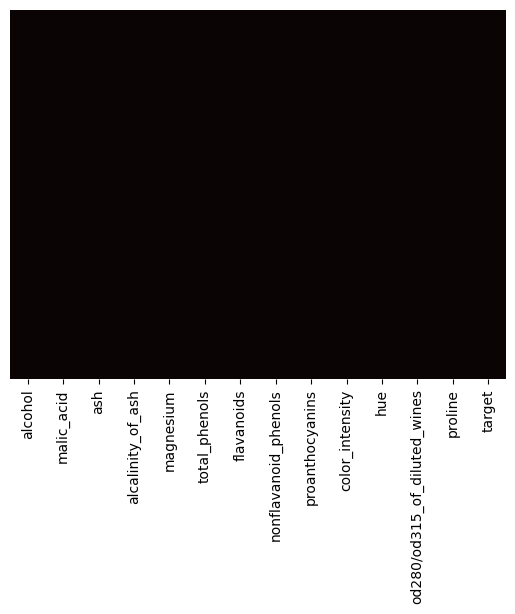

In [62]:
# heatmap of missing values

sns.heatmap(df.isnull(), cmap='mako', cbar=False, yticklabels=False)

No strips can be seen in the above plot. Might be because there is no missing value.<br/>
Let's confirm on this.

In [63]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

It is confirmed that there is no missing values in this dataset.

SCALING THE DATA

- Let's standardize the data

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))

scaled_feat = scaler.transform(df.drop('target', axis=1))
df_scaled_feat = pd.DataFrame(scaled_feat, columns=wine['feature_names'])
df_scaled_feat.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


TRAINING AND TESTING

In [65]:
from sklearn.model_selection import train_test_split

X = df_scaled_feat
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

PREDICTIONS

In [67]:
pred = KNN.predict(X_test)
pred

C:\Users\nannisaymy\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 0])

EVALUATION

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.92      0.96        25
           2       0.90      1.00      0.95         9

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

[[20  0  0]
 [ 1 23  1]
 [ 0  0  9]]


The model is quite good. <br/>
But, let's find a better k value.

In [69]:
error_rate = []

for k in range(1,40) :
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    pred = KNN.predict(X_test)
    error_rate.append(np.mean(y_test != pred))

C:\Users\nannisaymy\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nannisaymy\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Text(0, 0.5, 'Error Rate')

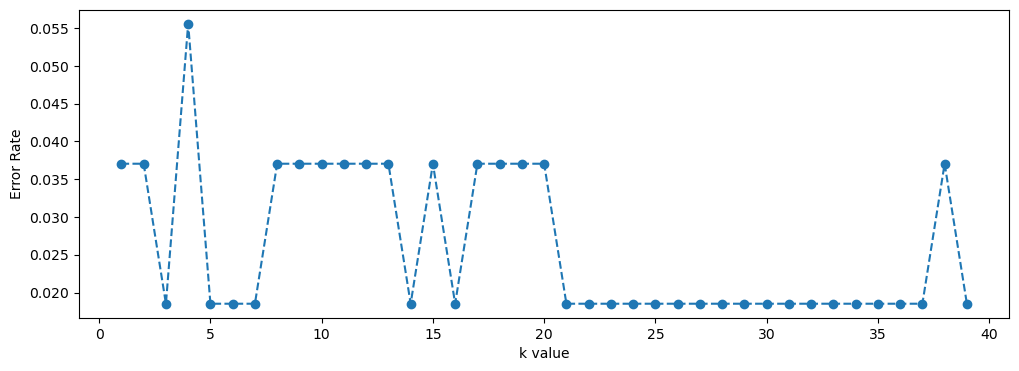

In [70]:
plt.figure(figsize=(12,4))
plt.plot(range(1,40), error_rate, ls='--', marker='o')
plt.xlabel('k value')
plt.ylabel('Error Rate')

Let's try k-3 since there is major drop at k=3

In [71]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.96      0.98        25
           2       0.90      1.00      0.95         9

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54

[[20  0  0]
 [ 0 24  1]
 [ 0  0  9]]


C:\Users\nannisaymy\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(50.722222222222214, 0.5, 'Predicted Values')

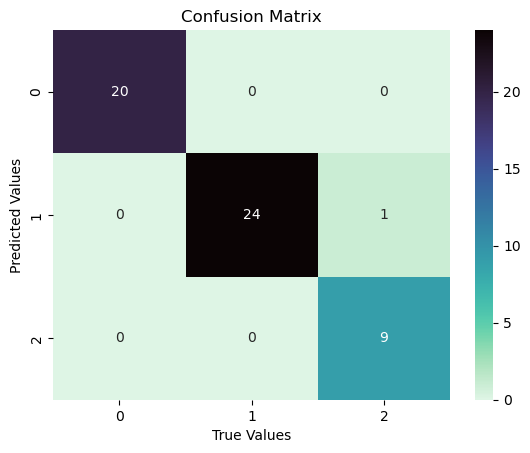

In [72]:
# confusion matrix heatmap

sns.heatmap(confusion_matrix(y_test, pred), cmap='mako_r', annot=True)
plt.title('Confusion Matrix')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

From the confusion matrix, we can see that there is only one entry predicted incorrectly by the model. <br/>
Also, the accuracy is high which is 98%. <br/>
Thus, this model is good.